In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# Lectura de matriz de alineamiento

In [2]:
df = pd.read_pickle("data/prueba100.pickle")
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.7027438, 0.20296031...","[0.4928643, 0.50155383, 0.0055818837]","[1.0, 0.0, 0.0]"
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.64837056, 0.2029603...","[0.4695498, 0.3973312, 0.13311893]","[1.0, 0.0, 0.0]"
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.4078711, 2.2245083,...","[1.4341879e-06, 8.787866e-05, 0.9999107]","[0.0, 0.0, 1.0]"
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 1.9305927, 0.10360007, 0.8346571, ...","[0.033964496, 0.008023773, 0.9580117]","[0.0, 0.0, 1.0]"
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.5160244, 0.10360007...","[0.0027733932, 0.9895504, 0.0076761814]","[0.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.41359743, 0.0717519...","[0.8000752, 0.17865694, 0.021267932]","[1.0, 0.0, 0.0]"
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.475788, 0.8695118, 0.72379255, 0...","[0.7528739, 0.18234292, 0.06478321]","[1.0, 0.0, 0.0]"
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.43997452, 1.9583746...","[7.513892e-05, 0.0013085654, 0.99861634]","[0.0, 0.0, 1.0]"
98,98,"[NULL{null,ADJ}, four{four,NUM}, children{chil...","[NULL{null,PROPN}, the{the,DET}, children{chil...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.44769567, 0.0726737...","[0.034316223, 0.83774996, 0.12793382]","[0.0, 0.0, 1.0]"


In [3]:
indice=2

In [4]:
t=pd.DataFrame(df.at[indice,"Text"][1:])
h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
print(len(t))
print(len(h))

18
7


In [5]:
texto1 = df.at[indice,"R_Text"]
hipotesis1 = df.at[indice,"R_Hip"]

In [6]:
#ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
ma=pd.DataFrame(np.dot(texto1[1:len(t)+1],hipotesis1[1:len(h)+1].T),index=t,columns=h)
ma

,"(a{a,DET},)","(boy{boy,NOUN},)","(sleeps{sleep,VERB},)","(in{in,ADP},)","(his{-PRON-,ADJ},)","(bed{bed,NOUN},)","(.{.,PUNCT},)"
"(a{a,DET},)",1.000000,0.368482,0.140102,0.454527,0.505652,0.295203,0.291600
"(young{young,ADJ},)",0.372369,0.684768,0.173587,0.297690,0.440236,0.270296,0.258760
"(boy{boy,NOUN},)",0.368482,1.000000,0.331375,0.250200,0.501530,0.373476,0.257555
"(runs{run,VERB},)",0.339245,0.221918,0.305346,0.301447,0.367234,0.164607,0.237685
"(across{across,ADP},)",0.354088,0.218106,0.099920,0.513059,0.338878,0.261370,0.273549
"(a{a,DET},)",1.000000,0.368482,0.140102,0.454527,0.505652,0.295203,0.291600
"(road{road,NOUN},)",0.290017,0.287958,0.179893,0.307242,0.348442,0.275574,0.323225
"(in{in,ADP},)",0.454527,0.250200,0.138889,1.000000,0.424085,0.319833,0.300469
"(front{front,NOUN},)",0.412706,0.307222,0.202102,0.333334,0.426733,0.376538,0.321544
"(of{of,ADP},)",0.450585,0.226490,0.034546,0.542424,0.470308,0.232095,0.314684


In [7]:
print(ma.max())
print(ma.idxmax())

(a{a,DET},)              1.000000
(boy{boy,NOUN},)         1.000000
(sleeps{sleep,VERB},)    0.331375
(in{in,ADP},)            1.000000
(his{-PRON-,ADJ},)       0.505652
(bed{bed,NOUN},)         0.376538
(.{.,PUNCT},)            1.000000
dtype: float32
(a{a,DET},)                       (a{a,DET},)
(boy{boy,NOUN},)             (boy{boy,NOUN},)
(sleeps{sleep,VERB},)        (boy{boy,NOUN},)
(in{in,ADP},)                   (in{in,ADP},)
(his{-PRON-,ADJ},)                (a{a,DET},)
(bed{bed,NOUN},)         (front{front,NOUN},)
(.{.,PUNCT},)                   (.{.,PUNCT},)
dtype: object


<AxesSubplot:>

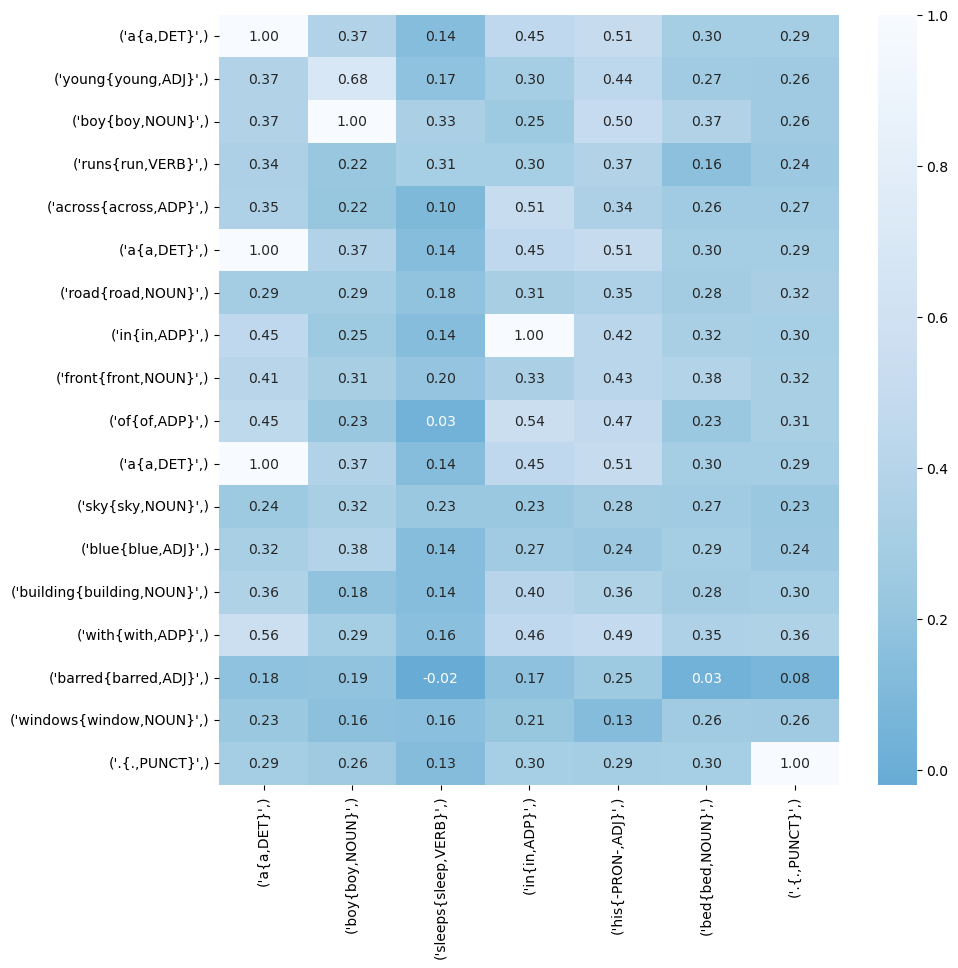

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ma, center=0, cmap='Blues_r', annot=True, fmt='.2f')

In [9]:
prueba=pd.read_csv("data/prueba.csv")

In [10]:
negativos=[]
positivos=[]
relaci=[]
mayor075=[]
mayor03=[]
mayor0=[]
mayor_promedio=[]
menor_promedio=[]
maximos=[]
minimos=[]
clase=prueba.gold_label.values
for indice in range(df.shape[0]):
    if len(df.at[indice,"Text"]) > 42 and len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t[:41],columns=h[:41])
    elif len(df.at[indice,"Text"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t[:41],columns=h)
    elif len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t,columns=h[:41])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t)
    else:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t,columns=h)
    neg=0
    posi=0
    asss=ma.columns
    for index,strings in ma.iterrows():
        for a in range(len(asss)):
            if strings[a]<=0:
                neg+=strings[a]
            else:
                posi+=strings[a]
    m075=0
    m03=0
    m0=0
    for index,strings in ma.iterrows():
        for a in range(len(asss)):
            if strings[a]>=1:
                m075+=1
            elif strings[a]>0.5 and strings[a]<0.9:
                m03+=1
            else:
                m0+=1
    c=ma.mean().values
    prome_mayor=0
    prome_menor=0
    
    for index,strings in ma.iterrows():
        for a in range(len(asss)):
            if strings[a]>=c[a]:
                prome_mayor+=1
            else:
                prome_menor+=1
    c=ma.max().values
    mayor=0
    menor=0
    
    for index,strings in ma.iterrows():
        for a in range(len(asss)):
            if strings[a]>=c[a]:
                mayor+=1
            else:
                menor+=1
    negativos.append(neg)
    positivos.append(posi)
    relaci.append(ma.shape[0]*ma.shape[1])
    mayor075.append(m075)
    mayor03.append(m03)
    mayor0.append(m0)
    mayor_promedio.append(prome_mayor)
    menor_promedio.append(prome_menor)
    maximos.append(mayor)
    minimos.append(menor)

In [11]:
lista=[clase,negativos,positivos,relaci,mayor075,mayor03,mayor0,mayor_promedio,menor_promedio,maximos,minimos]
data =pd.DataFrame(np.array(lista).T,columns=["gold_label","negatives","positives","relaciones","mayor075","mayor03_075","mmenor03","masprom","menorprom","maximos","menores"])
data

,gold_label,negatives,positives,relaciones,mayor075,mayor03_075,mmenor03,masprom,menorprom,maximos,menores
0,entailment,0,64.610194,220,5,9,206,91,129,13,207
1,entailment,0,91.542151,231,13,20,198,89,142,17,214
2,contradiction,-0.020026,41.557013,126,4,8,114,50,76,11,115
3,contradiction,0,31.002791,75,3,8,64,26,49,4,71
4,neutral,0,37.164854,108,1,17,90,47,61,11,97
...,...,...,...,...,...,...,...,...,...,...,...
95,entailment,-0.336202,55.555569,171,4,11,156,76,95,12,159
96,entailment,0,9.17433,21,2,2,17,6,15,3,18
97,contradiction,0,21.786175,60,7,0,53,25,35,14,46
98,contradiction,0,18.528244,48,3,5,40,14,34,6,42


In [146]:
data["resta"]=data["positives"]+data["negatives"]
data["posi_r"]=data["positives"]/data["relaciones"]
data["nega_r"]=data["negatives"]/data["relaciones"]
data

,gold_label,negatives,positives,relaciones,mayor075,mayor03_075,mmenor03,masprom,menorprom,maximos,menores,resta,posi_r,nega_r
0,entailment,0,64.610194,220,5,9,206,91,129,13,207,64.610194,0.293683,0.0
1,entailment,0,91.542151,231,13,20,198,89,142,17,214,91.542151,0.396286,0.0
2,contradiction,-0.020026,41.557013,126,4,8,114,50,76,11,115,41.536987,0.329818,-0.000159
3,contradiction,0,31.002791,75,3,8,64,26,49,4,71,31.002791,0.413371,0.0
4,neutral,0,37.164854,108,1,17,90,47,61,11,97,37.164854,0.344119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,entailment,-0.336202,55.555569,171,4,11,156,76,95,12,159,55.219367,0.324886,-0.001966
96,entailment,0,9.17433,21,2,2,17,6,15,3,18,9.17433,0.436873,0.0
97,contradiction,0,21.786175,60,7,0,53,25,35,14,46,21.786175,0.363103,0.0
98,contradiction,0,18.528244,48,3,5,40,14,34,6,42,18.528244,0.386005,0.0


array([[<AxesSubplot:title={'center':'negatives'}, xlabel='gold_label'>,
        <AxesSubplot:title={'center':'positives'}, xlabel='gold_label'>],
       [<AxesSubplot:title={'center':'resta'}, xlabel='gold_label'>,
        <AxesSubplot:>]], dtype=object)

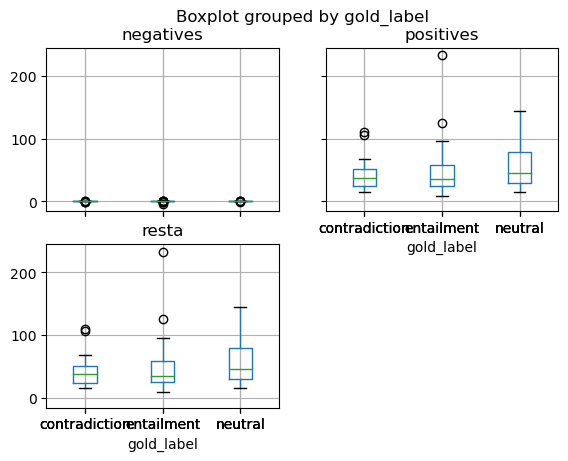

In [147]:
data.boxplot(by="gold_label",column=["negatives","positives","resta"])

<AxesSubplot:title={'center':'mayor075'}, xlabel='gold_label'>

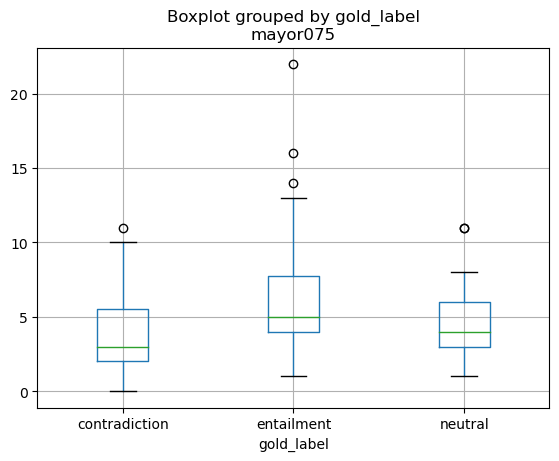

In [148]:
data.boxplot(by="gold_label",column=["mayor075"])

array([<AxesSubplot:title={'center':'masprom'}, xlabel='gold_label'>,
       <AxesSubplot:title={'center':'menorprom'}, xlabel='gold_label'>],
      dtype=object)

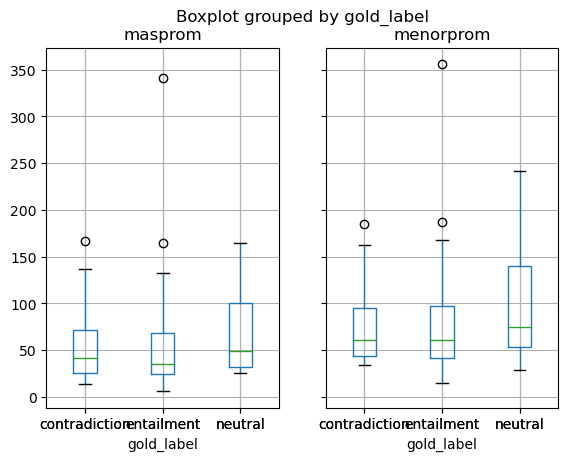

In [149]:
data.boxplot(by="gold_label",column=["masprom","menorprom"])

In [102]:
data["rel_max_min"]=data["maximos"]/data["menores"]
data

,gold_label,negatives,positives,relaciones,mayor075,mayor03_075,mmenor03,masprom,menorprom,maximos,menores,resta,posi_r,nega_r,rel_max_min
0,entailment,0,64.610194,220,6,84,130,91,129,13,207,64.610194,0.293683,0.0,0.062802
1,entailment,0,91.542151,231,17,135,79,89,142,17,214,91.542151,0.396286,0.0,0.079439
2,contradiction,-0.020026,41.557013,126,6,53,67,50,76,11,115,41.536987,0.329818,-0.000159,0.095652
3,contradiction,0,31.002791,75,3,58,14,26,49,4,71,31.002791,0.413371,0.0,0.056338
4,neutral,0,37.164854,108,3,52,53,47,61,11,97,37.164854,0.344119,0.0,0.113402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,entailment,-0.336202,55.555569,171,6,78,87,76,95,12,159,55.219367,0.324886,-0.001966,0.075472
96,entailment,0,9.17433,21,3,13,5,6,15,3,18,9.17433,0.436873,0.0,0.166667
97,contradiction,0,21.786175,60,7,17,36,25,35,14,46,21.786175,0.363103,0.0,0.304348
98,contradiction,0,18.528244,48,3,31,14,14,34,6,42,18.528244,0.386005,0.0,0.142857


array([<AxesSubplot:title={'center':'maximos'}, xlabel='gold_label'>,
       <AxesSubplot:title={'center':'menores'}, xlabel='gold_label'>],
      dtype=object)

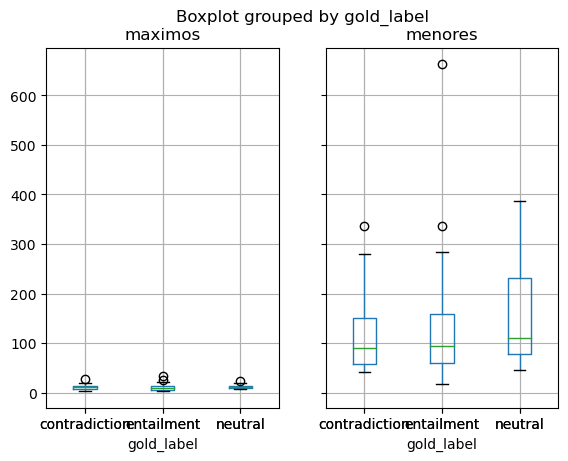

In [103]:
data.boxplot(by="gold_label",column=["maximos","menores"])

<AxesSubplot:title={'center':'rel_max_min'}, xlabel='gold_label'>

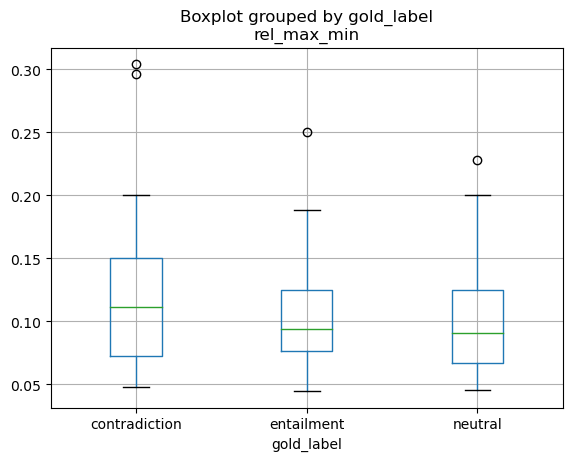

In [104]:
data.boxplot(by="gold_label",column=["rel_max_min"])

array([<AxesSubplot:title={'center':'posi_r'}, xlabel='gold_label'>,
       <AxesSubplot:title={'center':'nega_r'}, xlabel='gold_label'>],
      dtype=object)

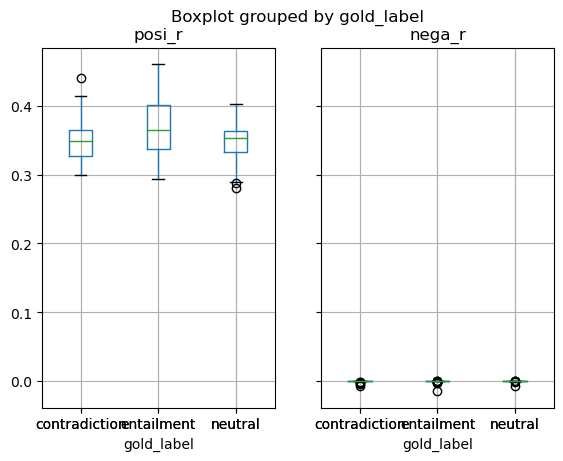

In [105]:
data.boxplot(by="gold_label",column=["posi_r","nega_r"])

In [107]:
ma

,"(one{one,NUM},)","(of{of,ADP},)","(the{the,DET},)","(men{man,NOUN},)","(is{be,VERB},)","(actually{actually,ADV},)","(sasquatch{sasquatch,NOUN},)","(.{.,PUNCT},)"
"(three{three,NUM},)",0.720659,0.489445,0.535110,0.418811,0.348098,0.411305,-0.067094,0.239443
"(men{man,NOUN},)",0.425404,0.325928,0.327094,1.000000,0.263269,0.364623,0.077643,0.281281
"(dressed{dress,VERB},)",0.351009,0.187930,0.271243,0.430402,0.257017,0.389713,0.088503,0.174687
"(in{in,ADP},)",0.483252,0.542424,0.555486,0.344737,0.421469,0.363700,-0.099284,0.300469
"(suits{suit,NOUN},)",0.308203,0.198451,0.229840,0.428806,0.240546,0.344928,0.052184,0.182348
"(and{and,CCONJ},)",0.519724,0.583599,0.562487,0.350932,0.458148,0.443346,-0.094332,0.432417
"(ties{tie,NOUN},)",0.331655,0.234883,0.266990,0.354612,0.182451,0.277400,0.010205,0.167588
"(clasps{clasp,VERB},)",0.081605,0.062148,0.024533,0.099468,-0.030116,0.016735,-0.006220,0.028881
"(their{-PRON-,ADJ},)",0.570653,0.512230,0.635757,0.434092,0.323281,0.464549,-0.038553,0.286409
"(raised{raise,VERB},)",0.417462,0.337941,0.392008,0.297643,0.379517,0.409186,-0.010537,0.276171


In [250]:
labels=["NOUN","VERB","ADJ","ADV"]
labels_dic={}
for l1 in labels:
    for l2 in labels:
        labels_dic[l1+"_"+l2]=[]
        labels_dic[l1+"_"+l2+"neg"]=[]

In [251]:
for indice in range(df.shape[0]):
    if len(df.at[indice,"Text"]) > 42 and len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t[:41],columns=h[:41])
    elif len(df.at[indice,"Text"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t[:41],columns=h)
    elif len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t,columns=h[:41])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t)
    else:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t,columns=h)
    
    asss=ma.columns
    for l1 in labels:
        for l2 in labels:
            neg=0
            posi=0
            for index,strings in ma.iterrows():
                if l1 in str(index):
                    for a in range(len(asss)):
                        if l2 in str(ma.columns[a]):
                            if strings[a]>=0.3:
                                posi+=1
                            elif strings[a]<0.3 and strings[a]>0:
                                neg+=1
            labels_dic[l1+"_"+l2].append(posi)
            labels_dic[l1+"_"+l2+"neg"].append(neg)
            #print(l,l2,posi," vs ",neg)

In [252]:
rev=pd.DataFrame(labels_dic)
rev

,NOUN_NOUN,NOUN_NOUNneg,NOUN_VERB,NOUN_VERBneg,NOUN_ADJ,NOUN_ADJneg,NOUN_ADV,NOUN_ADVneg,VERB_NOUN,VERB_NOUNneg,...,ADJ_ADV,ADJ_ADVneg,ADV_NOUN,ADV_NOUNneg,ADV_VERB,ADV_VERBneg,ADV_ADJ,ADV_ADJneg,ADV_ADV,ADV_ADVneg
0,4,24,1,6,1,6,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
1,11,13,3,3,4,2,0,0,7,5,...,0,0,0,0,0,0,0,0,0,0
2,5,7,1,5,4,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,3,3,9,3,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,3,6,2,4,0,0,0,0,0,3,...,0,0,1,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13,5,1,4,2,4,3,3,3,3,...,0,2,0,0,0,0,0,0,0,0
96,4,0,1,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
97,2,4,0,3,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
98,2,2,3,1,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [253]:
rev["clase"]=prueba.gold_label.values
rev

,NOUN_NOUN,NOUN_NOUNneg,NOUN_VERB,NOUN_VERBneg,NOUN_ADJ,NOUN_ADJneg,NOUN_ADV,NOUN_ADVneg,VERB_NOUN,VERB_NOUNneg,...,ADJ_ADVneg,ADV_NOUN,ADV_NOUNneg,ADV_VERB,ADV_VERBneg,ADV_ADJ,ADV_ADJneg,ADV_ADV,ADV_ADVneg,clase
0,4,24,1,6,1,6,0,0,5,7,...,0,0,0,0,0,0,0,0,0,entailment
1,11,13,3,3,4,2,0,0,7,5,...,0,0,0,0,0,0,0,0,0,entailment
2,5,7,1,5,4,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,contradiction
3,3,3,9,3,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,contradiction
4,3,6,2,4,0,0,0,0,0,3,...,0,1,2,2,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13,5,1,4,2,4,3,3,3,3,...,2,0,0,0,0,0,0,0,0,entailment
96,4,0,1,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,entailment
97,2,4,0,3,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,contradiction
98,2,2,3,1,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,contradiction


array([[<AxesSubplot:title={'center':'NOUN_NOUN'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'NOUN_VERB'}, xlabel='clase'>],
       [<AxesSubplot:title={'center':'NOUN_ADJ'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'NOUN_ADV'}, xlabel='clase'>]],
      dtype=object)

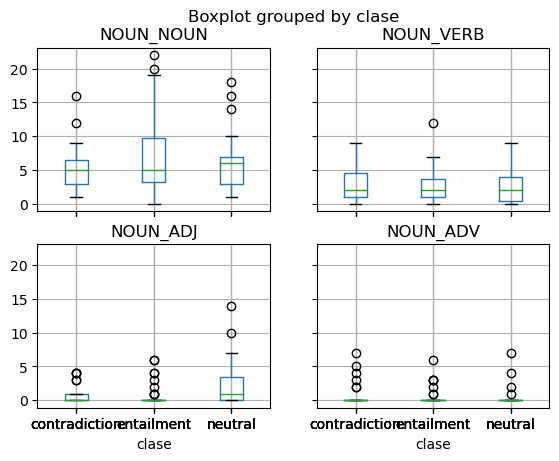

In [254]:
rev.boxplot(by="clase",column=["NOUN_NOUN","NOUN_VERB","NOUN_ADJ","NOUN_ADV"])

array([[<AxesSubplot:title={'center':'NOUN_NOUNneg'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'NOUN_VERBneg'}, xlabel='clase'>],
       [<AxesSubplot:title={'center':'NOUN_ADJneg'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'NOUN_ADVneg'}, xlabel='clase'>]],
      dtype=object)

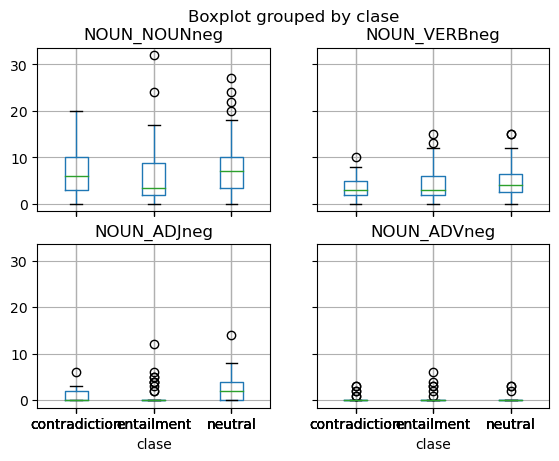

In [255]:
rev.boxplot(by="clase",column=["NOUN_NOUNneg","NOUN_VERBneg","NOUN_ADJneg","NOUN_ADVneg"])

array([[<AxesSubplot:title={'center':'VERB_VERB'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'VERB_NOUN'}, xlabel='clase'>],
       [<AxesSubplot:title={'center':'VERB_ADJ'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'VERB_ADV'}, xlabel='clase'>]],
      dtype=object)

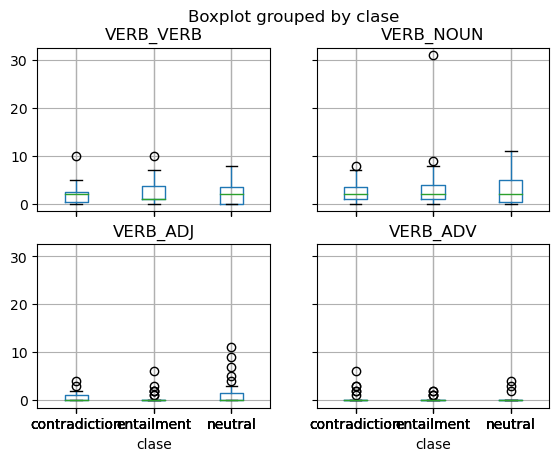

In [256]:
rev.boxplot(by="clase",column=["VERB_VERB","VERB_NOUN","VERB_ADJ","VERB_ADV"])

array([[<AxesSubplot:title={'center':'VERB_VERBneg'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'VERB_NOUNneg'}, xlabel='clase'>],
       [<AxesSubplot:title={'center':'VERB_ADJneg'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'VERB_ADVneg'}, xlabel='clase'>]],
      dtype=object)

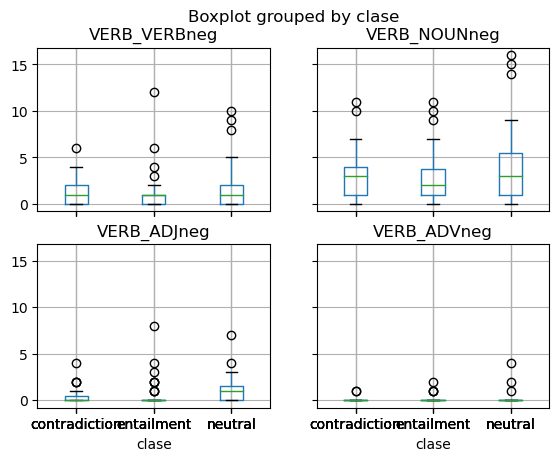

In [257]:
rev.boxplot(by="clase",column=["VERB_VERBneg","VERB_NOUNneg","VERB_ADJneg","VERB_ADVneg"])

array([[<AxesSubplot:title={'center':'ADJ_ADJ'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'ADJ_NOUN'}, xlabel='clase'>],
       [<AxesSubplot:title={'center':'ADJ_VERB'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'ADJ_ADV'}, xlabel='clase'>]],
      dtype=object)

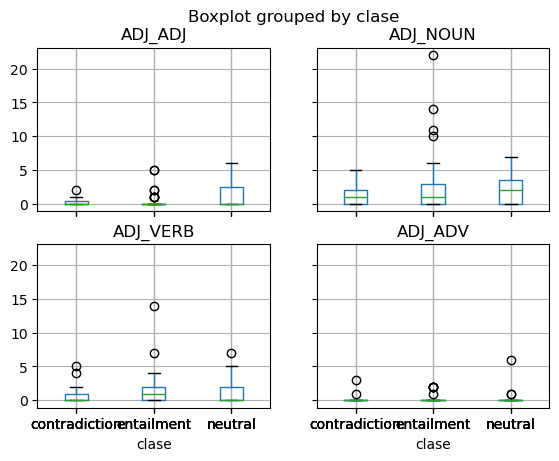

In [258]:
rev.boxplot(by="clase",column=["ADJ_ADJ","ADJ_NOUN","ADJ_VERB","ADJ_ADV"])

array([[<AxesSubplot:title={'center':'ADJ_ADJneg'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'ADJ_NOUNneg'}, xlabel='clase'>],
       [<AxesSubplot:title={'center':'ADJ_VERBneg'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'ADJ_ADVneg'}, xlabel='clase'>]],
      dtype=object)

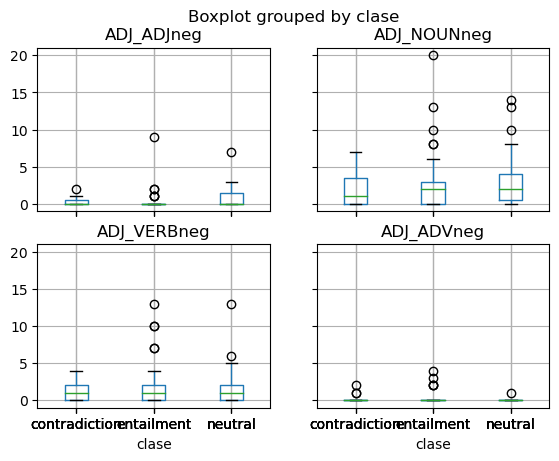

In [259]:
rev.boxplot(by="clase",column=["ADJ_ADJneg","ADJ_NOUNneg","ADJ_VERBneg","ADJ_ADVneg"])

array([[<AxesSubplot:title={'center':'ADV_ADV'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'ADV_NOUN'}, xlabel='clase'>],
       [<AxesSubplot:title={'center':'ADV_ADJ'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'ADV_VERB'}, xlabel='clase'>]],
      dtype=object)

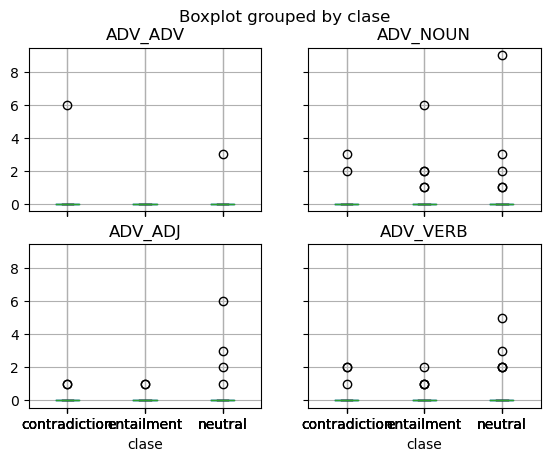

In [260]:
rev.boxplot(by="clase",column=["ADV_ADV","ADV_NOUN","ADV_ADJ","ADV_VERB"])

array([[<AxesSubplot:title={'center':'ADV_ADVneg'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'ADV_NOUNneg'}, xlabel='clase'>],
       [<AxesSubplot:title={'center':'ADV_ADJneg'}, xlabel='clase'>,
        <AxesSubplot:title={'center':'ADV_VERBneg'}, xlabel='clase'>]],
      dtype=object)

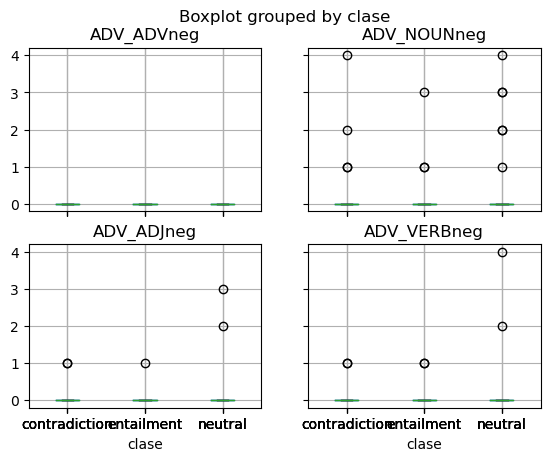

In [261]:
rev.boxplot(by="clase",column=["ADV_ADVneg","ADV_NOUNneg","ADV_ADJneg","ADV_VERBneg"])

# Texto -> Hipótesis, tomando la longitud de la hipótesis en [NOUN,VERB,ADJ,ADV]

In [264]:
ma.sum().sum()/ma.shape[0]*ma.shape[1]

20.503422787314967

In [265]:
ma.quantile(0.25).values

array([ 0.34133181,  0.27478316,  0.29129747,  0.28946175,  0.26014312,
        0.34478876, -0.05115708,  0.18912508])

In [309]:
def getRelacionesMA_corte(indice,df):
    indices=[]
    todas_relaciones=[]
    todas_relacionest=[]
    print(len(df.at[indice,"Text"]),len(df.at[indice,"Hipotesis"]))
    if len(df.at[indice,"Text"]) > 42 and len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t[:41],columns=h[:41])
    elif len(df.at[indice,"Text"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t[:41])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t[:41],columns=h)
    elif len(df.at[indice,"Hipotesis"]) > 42:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t,columns=h[:41])
        #ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h[:41],index=t)
    else:
        t=pd.DataFrame(df.at[indice,"Text"][1:])
        h=pd.DataFrame(df.at[indice,"Hipotesis"][1:])
        texto = df.at[indice,"R_Text"]
        hipotesis = df.at[indice,"R_Hip"]
        ma = pd.DataFrame(np.dot(texto[1:len(t)+1],hipotesis[1:len(h)+1].T),index=t,columns=h)
        #ma=pd.DataFrame(df.at[indice,"Text"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
    #ma=ma/(ma.sum()).sum()
    #print(ma)
    informacion=ma.sum().sum()/ma.shape[0]*ma.shape[1]
    c=ma.quantile(0.75).values #.quantile(corte).values
    print(c)
    for index,strings in ma.iterrows():
        #print(index)
        for l in range(len(c)):
            if 'NOUN' in str(index) or 'VERB' in str(index) or 'ADJ' in str(index) or 'PRON' in str(index) or 'ADV' in str(index):
                if 'NOUN' in str(ma.columns[l]) or 'VERB' in str(ma.columns[l]) or 'ADJ' in str(ma.columns[l]) or 'PRON' in str(ma.columns[l]) or 'ADV' in str(ma.columns[l]):
                    #print("columnna:",col,strings[col])
                    #print("umbral",c[l],strings[l])
                    if strings[l] >= 0.7:#c[l]:# >=1:
                        todas_relaciones.append((ma.columns[l],index,strings[l]))
                    #elif strings[l] < 0.3 and strings[l] > 0:
                    #    todas_relaciones.append((index,ma.columns[l],strings[l]))
    maximo=0
    indice_v=""
    columna_v=""
    c=ma.max()
    for l in range(len(c)):
        for index,strings in ma.iterrows():
            if("VERB" in str(index)):
                if("VERB" in str(ma.columns[l])):
                    if maximo<=c[l]:
                        maximo=c[l]
                        columna_v=str(ma.columns[l]).split('\'')[1].split("{")[0]
                        indice_v=str(index).split('\'')[1].split("{")[0]
    #Dirección contraria
    mat=ma.transpose()
    #print(ma)
    #print(ma.shape)
    #print(mat)
    #print(mat.shape)
    c1=mat.quantile(0.75).values #.quantile(corte).values
    for index,strings in mat.iterrows():
        for l in range(len(c1)):
            if 'NOUN' in str(index) or 'VERB' in str(index) or 'ADJ' in str(index) or 'PRON' in str(index) or 'ADV' in str(index):                
                if 'NOUN' in str(mat.columns[l]) or 'VERB' in str(mat.columns[l]) or 'ADJ' in str(mat.columns[l]) or 'PRON' in str(mat.columns[l]) or 'ADV' in str(mat.columns[l]):
                    #print("columnna:",col,strings[col])
                    #print("umbral",c[l])
                    if strings[l] >= 0.7:# c1[l]:# >=1:
                        todas_relacionest.append((index,mat.columns[l],strings[l]))
                    #elif strings[l] < 0.3 and strings[l] > 0:
                    #    todas_relacionest.append((index,mat.columns[l],strings[l]))
    labels=["NOUN","ADJ","VERB","ADV"]
    diccionarioTW = {}
    diccionarioTWT ={}
    print(todas_relaciones)
    #todas_relaciones=list(set(todas_relaciones))
    for l1 in labels[:]:
        for l2 in labels[:]:
            diccionarioTW[l1+"_"+l2]=[]
            diccionarioTWT[l1+"_"+l2]=[]
    for tr in todas_relaciones:
        #print(tr[0],"-",tr[1])
        t_=str(tr[0]).split(",")
        pt=t_[1].split("}")[0]
        h_=str(tr[1]).split(",")
        #print(t_,h_,"h0",h_[0])
        ph=h_[1].split("}")[0]
        if pt=="PRON":
            pt="NOUN"
        if ph=="PRON":
            ph="NOUN"
        #diccionarioTW[pt+"_"+ph].append(tr[2])
        if pt+"_"+ph in diccionarioTW:
            diccionarioTW[pt+"_"+ph].append(tr[2])
    for tr in todas_relacionest:
        #print(tr[0],"-",tr[1])
        t_=str(tr[0]).split(",")
        pt=t_[1].split("}")[0]
        h_=str(tr[1]).split(",")
        #print(t_,h_,"h0",h_[0])
        ph=h_[1].split("}")[0]
        if pt=="PRON":
            pt="NOUN"
        if ph=="PRON":
            ph="NOUN"
        #diccionarioTW[pt+"_"+ph].append(tr[2])
        if pt+"_"+ph in diccionarioTW:
            diccionarioTWT[pt+"_"+ph].append(tr[2])
    
    diccionarioTW_mean={}
    diccionarioTW_meanT={}
    diccionarioTW_mean_n={}
    diccionarioTW_rel={}
    for k in diccionarioTWT:
        if len(diccionarioTWT[k])!=0:
            diccionarioTW_meanT[k]=sum(diccionarioTWT[k])/len(diccionarioTWT[k])
        else:
            diccionarioTW_meanT[k]=0
    for k in diccionarioTW:
        if len(diccionarioTW[k])!=0:
            diccionarioTW_mean[k]=sum(diccionarioTW[k])/len(diccionarioTW[k])
            diccionarioTW_mean_n[k+"_"]=len(diccionarioTW[k])#/ma.shape[0]
            diccionarioTW_rel[k+"_r"]=sum(diccionarioTW[k])/len(diccionarioTW[k])#/ma.shape[0]
        else:
            diccionarioTW_mean[k]=0
            diccionarioTW_mean_n[k+"_"]=0
            diccionarioTW_rel[k+"_r"]=0
    print("todas",todas_relaciones) 
    print("todas",todas_relacionest) 
    #jaccard=len(set(todas_relaciones).intersection(set(todas_relacionest)))/len(set(todas_relaciones).union(set(todas_relacionest)))
    #print("jaccard",jaccard)
    return diccionarioTW_mean,diccionarioTW_mean_n,todas_relaciones,todas_relacionest,diccionarioTW_rel,indice_v,columna_v#diccionarioTW_meanT

# Lectura de los 100 pares de T y H (muestreo)

In [270]:
prueba=pd.read_csv("prueba.csv")

In [271]:
textos = prueba["sentence1"].to_list()
hipotesis = prueba["sentence2"].to_list()
print(textos)
print(hipotesis)

['A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray.', 'A man dressed in a red shirt and black tie stands up at a wedding reception to make a speech.', 'A young boy runs across a road in front of a sky blue building with barred windows.', 'An Asian woman is standing on a path with a basket on her head looking into a mirror she is holding in her hand.', 'A child in a maroon shirt playing next to a fountain.', 'man dressed in orange clothing with face covered seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall.', 'An old man with a package poses in front of an advertisement.', 'People dressed in traditional Japanese garb walk in a procession through a courtyard paved with paving stones.', 'Two children play in the snow by the side of the road.', 'Blond-haired girl wearing a bicycle helmet, a black t-shirt that reads "Twizzlers" and a printed dog tag necklace around her neck.',

In [272]:
import nltk, re, os
from nltk.corpus import wordnet as wn
import networkx as nx
from matplotlib import pyplot as plt


# Antonimia e hiponimia

In [273]:
def revision_ant_hipo(relaciones_alineadas,wn):
    sinonimos_words=[]
    antonimos_words=[]
    hyperonyms_words=[]
    hyponyms_words=[]
    relaciones_fuertes=[]
    verbos=[]
    for r_a in relaciones_alineadas[:]:
        sim=0
        sim_h=0
        cam_sh=0
        max_lch=0
        pal_sim_a=""
        pal_sim_b=""
        # pal_simp_a=""
        # pal_simp_b=""
        # pal_simsp_a=""
        # pal_simsp_b=""
        # pal_simlch_a=""
        # pal_simlch_b=""
        print(r_a[0],"a",r_a[1])
        word_t = str(r_a[0]).split('\'')[1]
        wt = word_t.split('{')[0]
        #lt = word_t.split('}')[0].split(',')[0].split('{')[1]
        print(word_t)
        print(word_t.split('}')[0].split(','))
        if len(word_t.split('}')[0].split(','))==2:
            pt = word_t.split('}')[0].split(',')[1]
        else:
            pt=""
        print(pt)
        w_in_text= wt + "," + pt
        #print(wt,lt,pt)
        word_h = str(r_a[1]).split('\'')[1]
        wh = word_h.split('{')[0] #palabra tal cual
        #lh = word_h.split('}')[0].split(',')[0].split('{')[1] #palabra lematizada
        print(word_h)
        if len(word_h.split('}')[0].split(','))==2:
            ph = word_h.split('}')[0].split(',')[1] # pos de la palabra
        else:
            ph=""
        print(ph)
        word = wh + "," + ph # palabra con el pos correspondiente
        #print(wh,lh,ph)
        ## buscamos medidas de las relaciones alineadas a traves de wordnet
        if pt == "NOUN" or pt=="PRON":
            w1_=wn.synsets(wt,wn.NOUN)
        elif pt == "VERB":
            w1_=wn.synsets(wt,wn.VERB)
        elif pt == "ADJ":
            w1_=wn.synsets(wt,wn.ADJ)
        elif pt == "ADV":
            w1_=wn.synsets(wt,wn.ADV)
        else:
            w1_=wn.synsets(wt)
        if ph == "NOUN" or ph=="PRON":
            w2_=wn.synsets(wh,wn.NOUN)
        elif ph == "VERB":
            w2_=wn.synsets(wh,wn.VERB)
        elif ph == "ADJ":
            w2_=wn.synsets(wh,wn.ADJ)
        elif ph == "ADV":
            w2_=wn.synsets(wh,wn.ADV)
        else:
            w2_=wn.synsets(wh)
        for a in w1_:
            for b in w2_:
                if pt==ph:            
                    #print(w_in_text,word)
                    #Busqueda en las definiciones
                    # defiiniciones=[]
                    # if wh in a.definition().split():
                    #     print("yes:",wh,a.definition().split())
                    if a.wup_similarity(b)>sim:
                        sim=a.wup_similarity(b)
                        pal_sim_a=a
                        pal_sim_b=b
                        
                    # if a.path_similarity(b, simulate_root=False)!=None:
                    #     if a.path_similarity(b, simulate_root=False)>sim_h:
                    #         sim_h=b.path_similarity(a, simulate_root=False)
                    #         pal_simp_a=a
                    #         pal_simp_b=b
                    # if a.shortest_path_distance(b)!=None:
                    #     if a.shortest_path_distance(b)>cam_sh:
                    #         cam_sh=a.shortest_path_distance(b)
                    #         pal_simsp_a=a
                    #         pal_simsp_b=b
                    # if a.pos()==b.pos():
                    #     if a.lch_similarity(b)>max_lch:
                    #         max_lch=a.lch_similarity(b)
                    #         pal_simlch_a=a
                    #         pal_simlch_b=b
        if pt==ph:
            if pt=="VERB":
                verbos.append((wt,wh,sim))
            if sim!=0:
                print("wup_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,sim)
                if pal_sim_a.path_similarity(pal_sim_b, simulate_root=False)!=None:
                    print("path_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.path_similarity(pal_sim_b, simulate_root=False))
                if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                    print("spath:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                if pal_sim_a.pos()==pal_sim_b.pos():
                    print("lch:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.lch_similarity(pal_sim_b))
                
                #relaciones fuertes combinando las medidas de wordnet
                #wup nos ayuda a filtrar que tan similares son
                #distancia más corta nos ayuda a identificar que no se encuentren muy lejos en el arbol de wordnet
                #lch similarity ayuda a identificar que en la taxonomia no se encunetren alejados, para los que
                #tienen unj hiperonimo en comun

                if sim>0.5:
                    if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                        if pal_sim_a.shortest_path_distance(pal_sim_b)<=7:
                            #if pal_sim_a.pos()==pal_sim_b.pos():
                                #if pal_sim_a.lch_similarity(pal_sim_b)<2.0:
                                    relaciones_fuertes.append((pal_sim_a,pal_sim_b))
                #else:
                #    relaciones_debiles.append((pal_sim_a,pal_sim_b,-sim))
                #Busqueda de relaciones de sinonimia y antonimia
                synonyms=[]
                antonyms=[]   
                for l in pal_sim_a.lemmas():
                    synonyms.append(l.name())
                    #print(l)
                    if l.antonyms():
                        #print(l.antonyms()[0])
                        antonyms.append(l.antonyms()[0].name())
                if wh in synonyms:
                    print("Sinonimo: ",wt,wh)
                    sinonimos_words.append((wt,wh))
                if wh in antonyms:
                    print("Antonimo: ",wt,wh)
                    antonimos_words.append((wt,wh))
                #Busqueda de relaciones de hiperonimia e hiponimia
                hyperonyms=pal_sim_a.hypernym_paths()
                for p in hyperonyms:
                    if pal_sim_b in p:
                        if(pal_sim_a.shortest_path_distance(pal_sim_b)!=0):
                            print("hiperonimo:",pal_sim_a,pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                            hyperonyms_words.append((wt,wh))
                        else:
                            sinonimos_words.append((wt,wh))
                hyponyms=pal_sim_b.hypernym_paths()
                for p in hyponyms:
                    if pal_sim_a in p:
                        if pal_sim_a.shortest_path_distance(pal_sim_b)!=0:
                            print("Hiponimo:",pal_sim_a,pal_sim_b,pal_sim_b.shortest_path_distance(pal_sim_a))
                            hyponyms_words.append((wt,wh))
                for lh in pal_sim_a.lowest_common_hypernyms(pal_sim_b):
                    print("minimos hyper",lh)
                    print("a->H",pal_sim_a.shortest_path_distance(lh))
                    print("b->H",pal_sim_b.shortest_path_distance(lh))
                print()
    print("sinonimos",len(set(sinonimos_words)),sinonimos_words)
    print("antonimos",len(set(antonimos_words)),antonimos_words)
    print("hyperonyms",len(set(hyperonyms_words)),hyperonyms_words)
    print("hyponyms",len(set(hyponyms_words)),hyponyms_words)
    print("relaciones fuertes:",relaciones_fuertes)
    #print("relaciones debiles:",relaciones_debiles)
    print("verbos: ",verbos)
    maxv=0
    for v in verbos:
        print(v)
        if(float(v[2])>=maxv):
            maxv=v[2]
            v1=v[0]
            v2=v[1]
    #print(v1,v2)    
    return [len(set(sinonimos_words)),len(set(antonimos_words)),len(set(hyperonyms_words)),len(set(hyponyms_words)),maxv]

In [274]:
import spacy

nlp = spacy.load("en_core_web_md")
doc = nlp("A man is not dressed in orange clothing seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
    if token.dep_=="ROOT":
        r=token.text
print(r)

c:\Users\Ninja\anaconda3\lib\site-packages\torch\__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


A a DET DT det X True True
man man NOUN NN nsubjpass xxx True False
is be AUX VBZ auxpass xx True True
not not PART RB neg xxx True True
dressed dress VERB VBN ROOT xxxx True False
in in ADP IN prep xx True True
orange orange ADJ JJ amod xxxx True False
clothing clothing NOUN NN pobj xxxx True False
seemingly seemingly ADV RB advmod xxxx True False
balancing balance VERB VBG advcl xxxx True False
on on ADP IN prep xx True True
a a DET DT det x True True
cane cane NOUN NN pobj xxxx True False
being be AUX VBG auxpass xxxx True True
held hold VERB VBN acl xxxx True False
be be AUX VB conj xx True True
a a DET DT det x True True
similarly similarly ADV RB advmod xxxx True False
dressed dress VERB VBN amod xxxx True False
man man NOUN NN attr xxx True False
sitting sit VERB VBG acl xxxx True False
crossed cross VERB VBD acl xxxx True False
legged legged ADJ JJ oprd xxxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
ground ground NOUN NN pobj xxxx True False
at 

In [275]:
import spacy
from spacy import displacy

# nlp = spacy.load("en_core_web_md")
# doc = nlp("A man is not dressed in orange clothing seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall")
# displacy.serve(doc, style="dep")

In [276]:
nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
doc1 = nlp("An old man runs in front of an advertisement.")
doc2 = nlp("A man sleeps in front of an ad for beer.")
for token in doc1:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
    if token.dep_=="ROOT":
        r_t=token
print(r_t)
for token in doc2:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
    #        token.shape_, token.is_alpha, token.is_stop)
    if token.dep_=="ROOT":
        r_h=token
print(r_h)
# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = r_t
burgers = r_h
print(french_fries, "<->", burgers, french_fries.similarity(burgers))

An an DET DT det Xx True True
old old ADJ JJ amod xxx True False
man man NOUN NN nsubj xxx True False
runs run VERB VBZ ROOT xxxx True False
in in ADP IN prep xx True True
front front NOUN NN pobj xxxx True True
of of ADP IN prep xx True True
an an DET DT det xx True True
advertisement advertisement NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
runs
sleeps
An old man runs in front of an advertisement. <-> A man sleeps in front of an ad for beer. 0.9374918953004442
runs <-> sleeps 0.30534598231315613


In [277]:
from sentence_transformers import SentenceTransformer, util, InputExample, losses
#Load the model(here we use minilm)
model = SentenceTransformer('all-MiniLM-L6-v2')
#We get the embeddings by calling model.encode()

# prueba

In [310]:
features=[]
length=len(textos)
for i in range(length):
#length=[0,1,2,3,4]
#for i in length:
    print(i)
    print("Texto: ",textos[i])
    print("Hipótesis: ",hipotesis[i])
    #print("similaridad: ",doc1.similarity(doc2))
    todas_relaciones,todos_conteos,relaciones_alineadas,relaciones_alineadast,relatip_num,tverb,hverb=getRelacionesMA_corte(i,df)
    doc1 = nlp(textos[i])
    for token in doc1:
        #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        #        token.shape_, token.is_alpha, token.is_stop)
        if token.text==tverb:
            r_t=token
    doc2 = nlp(hipotesis[i])
    for token in doc2:
        if token.text==hverb:
            r_h=token
    print(todas_relaciones)
    print("Relaciones",len(relaciones_alineadas),len(relaciones_alineadast))
    rel_semanticas=revision_ant_hipo(relaciones_alineadas,wn)
    print("semanticas",rel_semanticas)
    emb1 = model.encode(tverb)
    emb2 = model.encode(hverb)
    #Get the cosine similarity score between sentences
    cos_sim = util.cos_sim(emb1, emb2)
    similitud_verbos=float(cos_sim[0][0])
    print("verbos a comparar",tverb,hverb)
    if len(relaciones_alineadast)==0:
        total=0
    else:
        total=len(relaciones_alineadas)/len(relaciones_alineadast)
    features.append(list(todas_relaciones.values())+list(todos_conteos.values())+rel_semanticas+[similitud_verbos])#+list(todas_relacionesT.values()))
    #len((set(textos[i].split()).intersection(set(hipotesis[i]))))/len(set(textos[i].split()).union(set(hipotesis[i])))]) 
    #+rel_semanticast)#[doc1.similarity(doc2)]+)

0
Texto:  A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray.
Hipótesis:  A person in appropriate institution protection works with meals.
23 11
[0.45003548 0.46882299 0.44626245 0.39440011 0.2562098  0.25911367
 0.35301754 0.46046184 0.20161939 0.37274589]
[(('meals{meal,NOUN}',), ('food{food,NOUN}',), 0.73873556)]
todas [(('meals{meal,NOUN}',), ('food{food,NOUN}',), 0.73873556)]
todas [(('meals{meal,NOUN}',), ('food{food,NOUN}',), 0.73873556)]
{'NOUN_NOUN': 0.738735556602478, 'NOUN_ADJ': 0, 'NOUN_VERB': 0, 'NOUN_ADV': 0, 'ADJ_NOUN': 0, 'ADJ_ADJ': 0, 'ADJ_VERB': 0, 'ADJ_ADV': 0, 'VERB_NOUN': 0, 'VERB_ADJ': 0, 'VERB_VERB': 0, 'VERB_ADV': 0, 'ADV_NOUN': 0, 'ADV_ADJ': 0, 'ADV_VERB': 0, 'ADV_ADV': 0}
Relaciones 1 1
('meals{meal,NOUN}',) a ('food{food,NOUN}',)
meals{meal,NOUN}
['meals{meal', 'NOUN']
NOUN
food{food,NOUN}
NOUN
wup_sim: Palabra1:  Synset('meal.n.01') Palabra2: Synset('food.n.01') 0.8333333333333334
path_sim: Palabra1:  Synset('meal.n.01

In [311]:
df1 = pd.DataFrame(features, columns=list(todas_relaciones)+list(todos_conteos)+["sinonimos","antonimos","hiperonimos","hiponimos","action_wn","sim verbos"])#+list(todas_relacionesT))#,"similaridad_1_2","dif"])
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,sim verbos
0,0.738736,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,0,0,1,0,0.0,0.165178
1,0.902263,0.000000,0.0,0,0.0,0.869893,0,0,0.0,0,...,0,0,0,0,4,0,1,0,1.0,0.798416
2,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,1,0,0,0,0.0,0.360803
3,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,2,0,0,0,1.0,0.522530
4,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,2,0,0,0,0.0,0.347747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,1,0,0,0,1.0,1.000000
96,1.000000,0.768382,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,2,0,0,0,0.0,0.895790
97,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.198153
98,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,2,0,0,0,1.0,0.322019


In [312]:
gold_label=prueba.gold_label.values
gold_label

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [313]:
df1["CLASS"]=gold_label

In [314]:
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,sim verbos,CLASS
0,0.738736,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,0,1,0,0.0,0.165178,entailment
1,0.902263,0.000000,0.0,0,0.0,0.869893,0,0,0.0,0,...,0,0,0,4,0,1,0,1.0,0.798416,entailment
2,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,1,0,0,0,0.0,0.360803,contradiction
3,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,2,0,0,0,1.0,0.522530,contradiction
4,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,2,0,0,0,0.0,0.347747,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,1,0,0,0,1.0,1.000000,entailment
96,1.000000,0.768382,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,2,0,0,0,0.0,0.895790,entailment
97,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.198153,contradiction
98,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,2,0,0,0,1.0,0.322019,contradiction


In [315]:
#df1.to_csv("TipoPalabra_conteos_umbral_mean.csv")
#df1.to_csv("TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_2.csv")
#df1.to_csv("TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_3.csv",index=False)
df1.to_csv("TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAspromedioMAXjacca.csv",index=False)


In [292]:
df1.columns

Index(['NOUN_NOUN', 'NOUN_ADJ', 'NOUN_VERB', 'NOUN_ADV', 'ADJ_NOUN', 'ADJ_ADJ',
       'ADJ_VERB', 'ADJ_ADV', 'VERB_NOUN', 'VERB_ADJ', 'VERB_VERB', 'VERB_ADV',
       'ADV_NOUN', 'ADV_ADJ', 'ADV_VERB', 'ADV_ADV', 'NOUN_NOUN_', 'NOUN_ADJ_',
       'NOUN_VERB_', 'NOUN_ADV_', 'ADJ_NOUN_', 'ADJ_ADJ_', 'ADJ_VERB_',
       'ADJ_ADV_', 'VERB_NOUN_', 'VERB_ADJ_', 'VERB_VERB_', 'VERB_ADV_',
       'ADV_NOUN_', 'ADV_ADJ_', 'ADV_VERB_', 'ADV_ADV_', 'sinonimos',
       'antonimos', 'hiperonimos', 'hiponimos', 'action_wn', 'sim verbos',
       'cantidad', 'jaccard', 'CLASS'],
      dtype='object')

In [158]:
a=list(todas_relaciones)
a

['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']